In [1]:
# Importing the Required Libraries for the entire Assignment :
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    confusion_matrix, classification_report, ConfusionMatrixDisplay,
    mean_squared_error, mean_absolute_error, r2_score, accuracy_score)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree


from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


!pip install graphviz


In [3]:
# Reading the Youth Data file
df=pd.read_csv(r"C:\Users\missi\Downloads\youth_data.csv")
df

,IRALCFY,IRMJFY,IRCIGFM,IRSMKLSS30N,IRALCFM,IRMJFM,IRCIGAGE,IRSMKLSSTRY,IRALCAGE,IRMJAGE,...,EDUSCHLGO,EDUSCHGRD2,EDUSKPCOM,IMOTHER,IFATHER,INCOME,GOVTPROG,POVERTY3,PDEN10,COUTYP4
0,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,3,0,1,1,2,2,1,2,2
1,991,60,91.0,91,91.0,2.0,991,991,991,14,...,1,6,0,1,1,2,2,1,2,2
2,1,991,91.0,91,93.0,91.0,991,991,11,991,...,1,2,1,1,1,4,2,3,1,1
3,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,2,0,1,1,3,2,2,1,1
4,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,5,0,1,1,4,2,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10556,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,6,99,1,1,4,2,3,1,1
10557,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,3,0,1,1,4,2,3,2,2
10558,991,991,91.0,91,91.0,91.0,991,991,991,991,...,97,98,98,1,1,1,1,1,2,2
10559,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,2,99,1,1,4,2,3,1,1


In [4]:
# Checking the shape and data-types
print(df.shape)
df.dtypes

(10561, 79)


IRALCFY          int64
IRMJFY           int64
IRCIGFM        float64
IRSMKLSS30N      int64
IRALCFM        float64
                ...   
INCOME           int64
GOVTPROG         int64
POVERTY3         int64
PDEN10           int64
COUTYP4          int64
Length: 79, dtype: object

In [5]:
# Checking for Missing values in the dataset
na_check = df.isnull().sum()
na_cols =na_check[na_check > 0]
na_cols

TCHGJOB      43
AVGGRADE    716
STNDSCIG    377
STNDSMJ     445
STNDALC     454
STNDDNK     550
PARCHKHW     77
PARHLPHW     89
PRCHORE2     35
PRLMTTV2     68
PARLMTSN    259
PRGDJOB2     63
PRPROUD2     77
ARGUPAR     180
YOFIGHT2     67
YOGRPFT2     64
YOHGUN2      46
YOSELL2      25
YOSTOLE2     40
YOATTAK2     41
PRPKCIG2     96
PRMJEVR2    101
PRMJMO      100
PRALDLY2     91
YFLPKCG2     90
YFLTMRJ2     89
YFLMJMO      92
YFLADLY2     93
FRDPCIG2    146
FRDMEVR2    152
FRDMJMON    152
FRDADLY2    147
TALKPROB    336
PRTALK3     199
PRBSOLV2    286
PREVIOL2    142
PRVDRGO2    102
GRPCNSL2    120
PREGPGM2     98
YTHACT2      68
DRPRVME3    193
ANYEDUC3    167
RLGATTD     288
RLGIMPT     321
RLGDCSN     297
RLGFRND     322
HEALTH2      13
dtype: int64

In [6]:
# Checking Unique Values : Which are Numerical and Categorical Features 
uniq_val=df.nunique().sort_values()
uniq_val

YOATTAK2       2
PRLMTTV2       2
PARLMTSN       2
PRGDJOB2       2
PRPROUD2       2
            ... 
IRALCFM       25
EDUSKPCOM     33
IRMJFM        36
IRALCFY       90
IRMJFY       139
Length: 79, dtype: int64

In [7]:
uniq_val.head(50)

YOATTAK2    2
PRLMTTV2    2
PARLMTSN    2
PRGDJOB2    2
PRPROUD2    2
ARGUPAR     2
YOFIGHT2    2
YOGRPFT2    2
YOHGUN2     2
YOSELL2     2
YOSTOLE2    2
PREVIOL2    2
PRCHORE2    2
PRPKCIG2    2
PRMJMO      2
PRALDLY2    2
YFLPKCG2    2
YFLTMRJ2    2
YFLMJMO     2
YFLADLY2    2
FRDPCIG2    2
FRDMEVR2    2
FRDMJMON    2
FRDADLY2    2
TALKPROB    2
PRMJEVR2    2
PRTALK3     2
PARHLPHW    2
STNDDNK     2
GOVTPROG    2
IRSEX       2
RLGFRND     2
RLGDCSN     2
RLGIMPT     2
RLGATTD     2
MRJFLAG     2
ALCFLAG     2
PARCHKHW    2
ANYEDUC3    2
TOBFLAG     2
YTHACT2     2
PREGPGM2    2
GRPCNSL2    2
PRVDRGO2    2
SCHFELT     2
TCHGJOB     2
AVGGRADE    2
STNDSCIG    2
STNDSMJ     2
STNDALC     2
dtype: int64

In [8]:
uniq_val.tail(30)

STNDALC          2
DRPRVME3         2
PRBSOLV2         2
IMOTHER          3
IFATHER          3
POVERTY3         3
COUTYP4          3
PDEN10           3
INCOME           4
HEALTH2          4
SMKLSMDAYS       5
MRJMDAYS         5
ALCMDAYS         5
CIGMDAYS         6
MRJYDAYS         6
ALCYDAYS         6
EDUSCHLGO        7
NEWRACE2         7
IRSMKLSSTRY     12
EDUSCHGRD2      12
IRSMKLSS30N     14
IRMJAGE         15
IRCIGAGE        17
IRALCAGE        18
IRCIGFM         21
IRALCFM         25
EDUSKPCOM       33
IRMJFM          36
IRALCFY         90
IRMJFY         139
dtype: int64

In [9]:
# Looking for Special Codes:
unique_values = df['IRCIGAGE'].unique()
print(unique_values)

[991  17  14  16  12  15  10  13  11   4   8   1   6   9   7   5   3]


## 1) Binary Classification : Has the Youth Ever Smoked a Cigarette ?

In [11]:
# Adding a New Has_Smoked Column :
def smoke_check(val):
    if pd.isna(val) or val == 991: 
        return 0
    else:
        return 1

df['Has_Smoked'] = df['IRCIGAGE'].apply(smoke_check)
print(df['Has_Smoked'].value_counts())

Has_Smoked
0    9796
1     765
Name: count, dtype: int64


In [12]:
# Checking if Has_Smoked Column is added:
df.shape

(10561, 80)

In [13]:
pd.set_option('display.max_rows', None)     
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.max_colwidth', None) 

print(df.corr())


              IRALCFY    IRMJFY   IRCIGFM  IRSMKLSS30N   IRALCFM    IRMJFM  \
IRALCFY      1.000000  0.480024  0.174870     0.061198  0.558065  0.382169   
IRMJFY       0.480024  1.000000  0.208663     0.094708  0.365347  0.670561   
IRCIGFM      0.174870  0.208663  1.000000     0.048240  0.196959  0.232038   
IRSMKLSS30N  0.061198  0.094708  0.048240     1.000000  0.055798  0.111872   
IRALCFM      0.558065  0.365347  0.196959     0.055798  1.000000  0.351525   
IRMJFM       0.382169  0.670561  0.232038     0.111872  0.351525  1.000000   
IRCIGAGE     0.332656  0.403386  0.378756     0.070022  0.287774  0.349412   
IRSMKLSSTRY  0.154296  0.169988  0.196746     0.388914  0.156415  0.157256   
IRALCAGE     0.851067  0.478999  0.163072     0.050171  0.474686  0.369506   
IRMJAGE      0.495516  0.895179  0.219814     0.094154  0.370275  0.632021   
MRJFLAG     -0.495536 -0.895342 -0.219687    -0.094127 -0.370297 -0.631952   
ALCFLAG     -0.851542 -0.479080 -0.162938    -0.050127 -0.474824

In [14]:
corr_mat = df.corr().abs()  
upper = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
high_corr = upper.stack()[upper.stack() > 0.8].sort_values(ascending=False)
print("Highly correlated feature pairs:\n")
print(high_corr)

Highly correlated feature pairs:

IRMJAGE      MRJFLAG       0.999998
IRCIGAGE     Has_Smoked    0.999996
IRALCAGE     ALCFLAG       0.999996
IRALCFM      ALCMDAYS      0.984730
IRALCFY      ALCYDAYS      0.983981
IRCIGFM      CIGMDAYS      0.981908
IRSMKLSS30N  SMKLSMDAYS    0.966446
IRMJFY       MRJYDAYS      0.958355
IRMJFM       MRJMDAYS      0.943412
IRMJFY       MRJFLAG       0.895342
             IRMJAGE       0.895179
INCOME       POVERTY3      0.890816
TOBFLAG      Has_Smoked    0.884763
IRCIGAGE     TOBFLAG       0.884760
PDEN10       COUTYP4       0.877758
FRDMEVR2     FRDMJMON      0.851847
YFLTMRJ2     YFLMJMO       0.851815
IRALCFY      ALCFLAG       0.851542
             IRALCAGE      0.851067
ALCFLAG      ALCYDAYS      0.832923
IRALCAGE     ALCYDAYS      0.832373
MRJFLAG      MRJYDAYS      0.830856
IRMJAGE      MRJYDAYS      0.830539
PRMJEVR2     PRMJMO        0.807105
dtype: float64


In [15]:
# Just checking if any Correlation with the Target :
correl = df.corr(numeric_only=True)['Has_Smoked'].sort_values(ascending=False)
correl

Has_Smoked     1.000000
TOBFLAG        0.884763
MRJFLAG        0.443146
ALCFLAG        0.377110
YFLMJMO        0.247390
FRDMJMON       0.247076
YFLTMRJ2       0.230963
FRDMEVR2       0.230032
PRMJMO         0.202783
PRMJEVR2       0.198889
FRDADLY2       0.169986
YFLADLY2       0.145075
HEALTH2        0.137042
FRDPCIG2       0.114702
YFLPKCG2       0.113809
PRPROUD2       0.113463
PRALDLY2       0.109520
PRPKCIG2       0.109491
ARGUPAR        0.106034
PARHLPHW       0.100259
PARCHKHW       0.099765
SCHFELT        0.097840
PRGDJOB2       0.097786
RLGIMPT        0.089964
RLGDCSN        0.085444
TCHGJOB        0.082408
PRLMTTV2       0.072289
COUTYP4        0.071231
RLGFRND        0.066593
PDEN10         0.062949
EDUSKPCOM      0.059734
EDUSCHGRD2     0.058375
RLGATTD        0.057040
IMOTHER        0.051370
IFATHER        0.041867
ANYEDUC3       0.035847
PRCHORE2       0.031377
DRPRVME3       0.021942
IRSEX          0.021348
EDUSCHLGO      0.020781
PARLMTSN       0.005430
PRTALK3        0

In [16]:
# Categorizing the Numerical and Categorical Features in the Dataset:

all_cols = [col for col in df.columns if col != 'Has_Smoked']
num_features = all_cols[:10] + ['EDUSKPCOM']
categ_features = [col for col in all_cols if col not in num_features]

print("Numerical features:", num_features)
print("Categorical features:", categ_features)


Numerical features: ['IRALCFY', 'IRMJFY', 'IRCIGFM', 'IRSMKLSS30N', 'IRALCFM', 'IRMJFM', 'IRCIGAGE', 'IRSMKLSSTRY', 'IRALCAGE', 'IRMJAGE', 'EDUSKPCOM']
Categorical features: ['MRJFLAG', 'ALCFLAG', 'TOBFLAG', 'ALCYDAYS', 'MRJYDAYS', 'ALCMDAYS', 'MRJMDAYS', 'CIGMDAYS', 'SMKLSMDAYS', 'SCHFELT', 'TCHGJOB', 'AVGGRADE', 'STNDSCIG', 'STNDSMJ', 'STNDALC', 'STNDDNK', 'PARCHKHW', 'PARHLPHW', 'PRCHORE2', 'PRLMTTV2', 'PARLMTSN', 'PRGDJOB2', 'PRPROUD2', 'ARGUPAR', 'YOFIGHT2', 'YOGRPFT2', 'YOHGUN2', 'YOSELL2', 'YOSTOLE2', 'YOATTAK2', 'PRPKCIG2', 'PRMJEVR2', 'PRMJMO', 'PRALDLY2', 'YFLPKCG2', 'YFLTMRJ2', 'YFLMJMO', 'YFLADLY2', 'FRDPCIG2', 'FRDMEVR2', 'FRDMJMON', 'FRDADLY2', 'TALKPROB', 'PRTALK3', 'PRBSOLV2', 'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2', 'YTHACT2', 'DRPRVME3', 'ANYEDUC3', 'RLGATTD', 'RLGIMPT', 'RLGDCSN', 'RLGFRND', 'IRSEX', 'NEWRACE2', 'HEALTH2', 'EDUSCHLGO', 'EDUSCHGRD2', 'IMOTHER', 'IFATHER', 'INCOME', 'GOVTPROG', 'POVERTY3', 'PDEN10', 'COUTYP4']


C:\Users\missi\AppData\Local\Temp\ipykernel_21332\1464100989.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Has_Smoked', y=col, data=df, palette='Set2', ax=axes[i])
C:\Users\missi\AppData\Local\Temp\ipykernel_21332\1464100989.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Has_Smoked', y=col, data=df, palette='Set2', ax=axes[i])
C:\Users\missi\AppData\Local\Temp\ipykernel_21332\1464100989.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Has_Smoked', y=col, data=df, palette='Set2', ax=axes[i])
C:\Users\missi\AppData\Lo

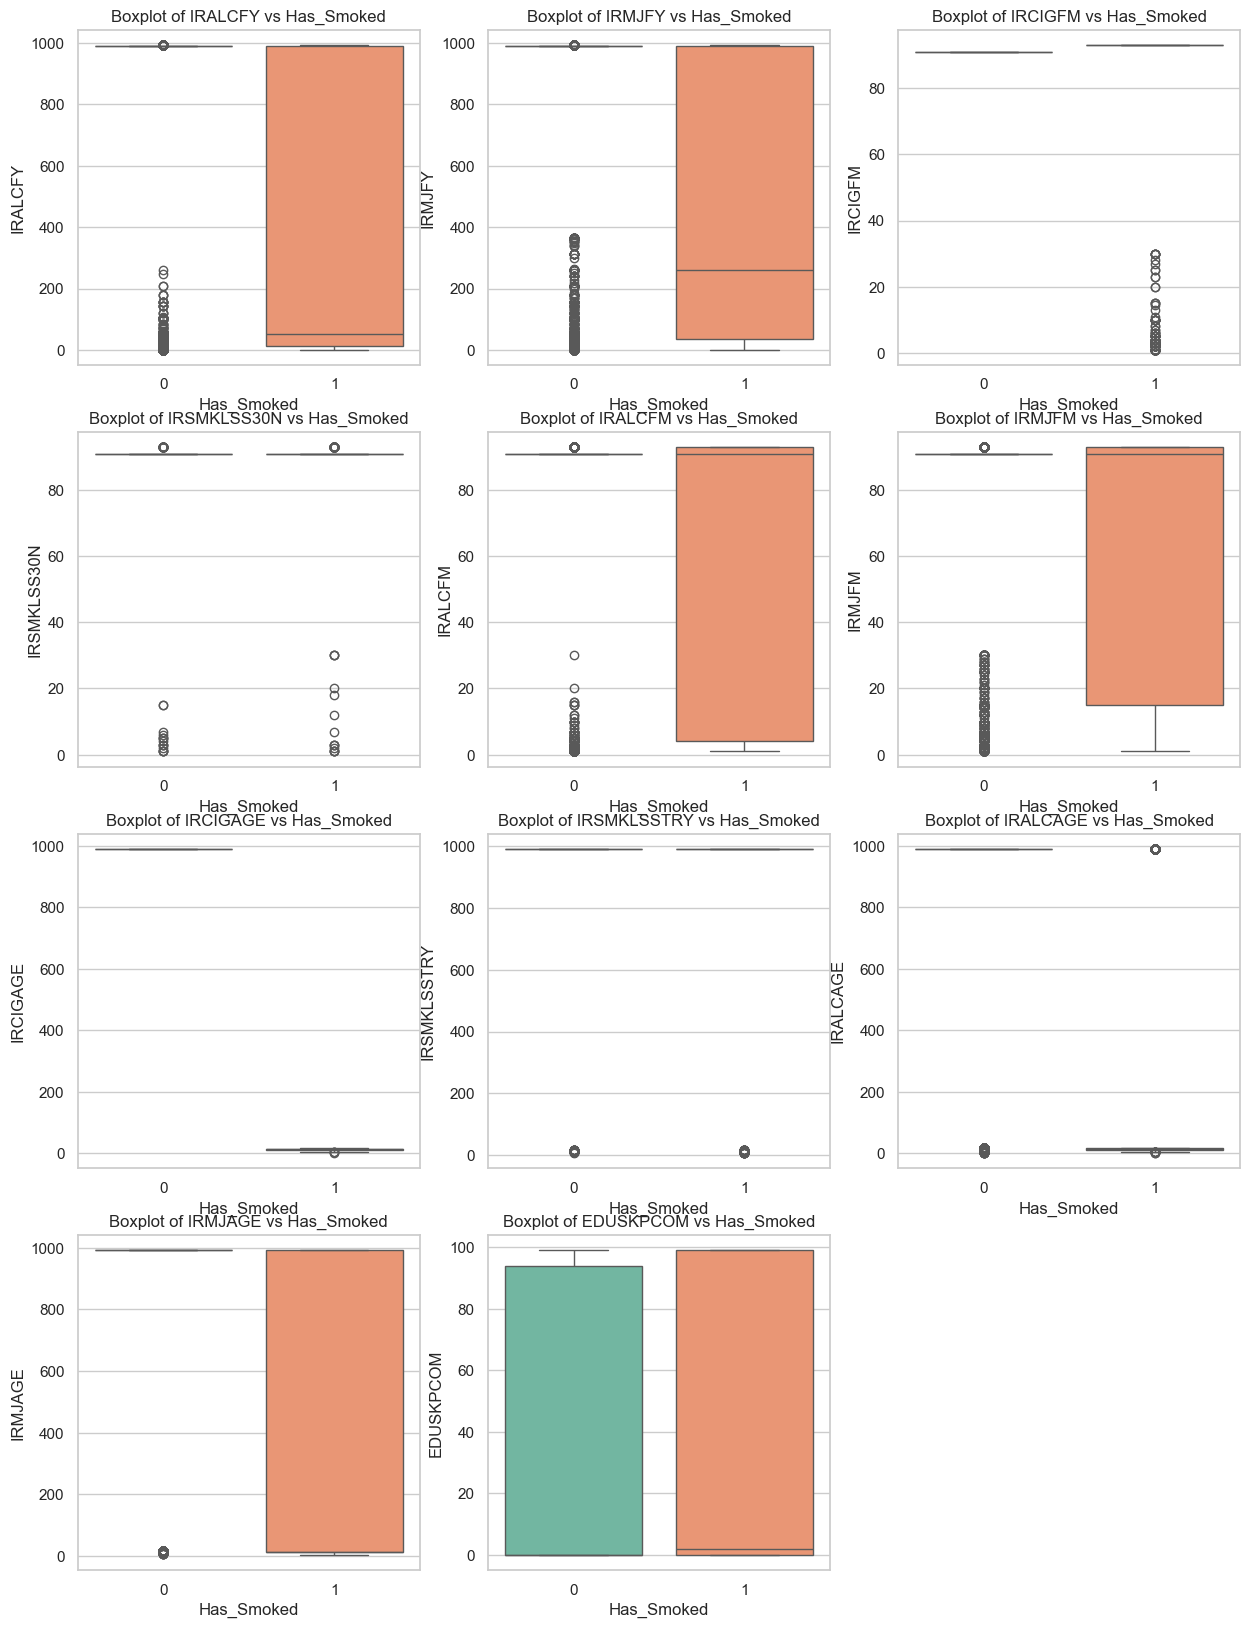

In [17]:
# Plotting the Boxplots for the Correlation of Numerical Features with Target: Has_Smoked

sns.set(style="whitegrid")

# Rows and Columns for subplots 
n_rows = len(num_features) // 3 + 1  
n_cols = 3 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.boxplot(x='Has_Smoked', y=col, data=df, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} vs Has_Smoked')
    axes[i].set_xlabel('Has_Smoked')
    axes[i].set_ylabel(col)

for i in range(len(num_features), len(axes)):
    axes[i].axis('off')

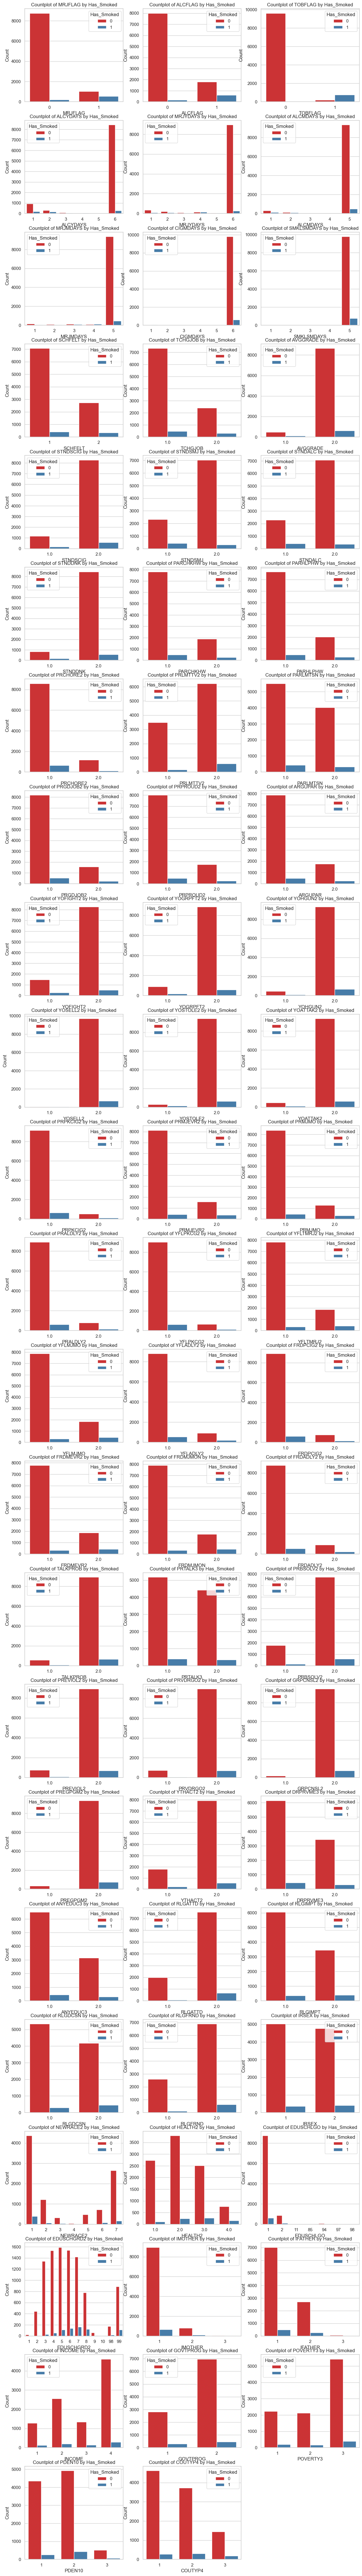

In [19]:
# Plotting the Countplots for the Correlation of Categorical Features with Target: Has_Smoked
n_rows_cat = len(categ_features) // 3 + 1  
n_cols_cat = 3  

fig_cat, axes_cat = plt.subplots(n_rows_cat, n_cols_cat, figsize=(15, n_rows_cat * 5))
axes_cat = axes_cat.flatten()

for i, col in enumerate(categ_features):
    sns.countplot(data=df, x=col, hue='Has_Smoked', palette='Set1', ax=axes_cat[i])
    axes_cat[i].set_title(f'Countplot of {col} by Has_Smoked')
    axes_cat[i].set_xlabel(col)
    axes_cat[i].set_ylabel('Count')

for i in range(len(categ_features), len(axes_cat)):
    axes_cat[i].axis('off')

In [20]:
# Replacing Special Codes = NA in the CodeBook as NaN:
special_codes = [ 94, 97, 98,99]
df.replace(special_codes, np.nan, inplace=True)

In [21]:
df.head(10)

,IRALCFY,IRMJFY,IRCIGFM,IRSMKLSS30N,IRALCFM,IRMJFM,IRCIGAGE,IRSMKLSSTRY,IRALCAGE,IRMJAGE,MRJFLAG,ALCFLAG,TOBFLAG,ALCYDAYS,MRJYDAYS,ALCMDAYS,MRJMDAYS,CIGMDAYS,SMKLSMDAYS,SCHFELT,TCHGJOB,AVGGRADE,STNDSCIG,STNDSMJ,STNDALC,STNDDNK,PARCHKHW,PARHLPHW,PRCHORE2,PRLMTTV2,PARLMTSN,PRGDJOB2,PRPROUD2,ARGUPAR,YOFIGHT2,YOGRPFT2,YOHGUN2,YOSELL2,YOSTOLE2,YOATTAK2,PRPKCIG2,PRMJEVR2,PRMJMO,PRALDLY2,YFLPKCG2,YFLTMRJ2,YFLMJMO,YFLADLY2,FRDPCIG2,FRDMEVR2,FRDMJMON,FRDADLY2,TALKPROB,PRTALK3,PRBSOLV2,PREVIOL2,PRVDRGO2,GRPCNSL2,PREGPGM2,YTHACT2,DRPRVME3,ANYEDUC3,RLGATTD,RLGIMPT,RLGDCSN,RLGFRND,IRSEX,NEWRACE2,HEALTH2,EDUSCHLGO,EDUSCHGRD2,EDUSKPCOM,IMOTHER,IFATHER,INCOME,GOVTPROG,POVERTY3,PDEN10,COUTYP4,Has_Smoked
0,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1,7,3.0,1.0,3.0,0.0,1,1,2,2,1,2,2,0
1,991,60.0,91.0,91,91.0,2.0,991,991,991,14,1,0,0,6,3,5,1,6,5,2,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2,1,4.0,1.0,6.0,0.0,1,1,2,2,1,2,2,0
2,1,991.0,91.0,91,93.0,91.0,991,991,11,991,0,1,0,1,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1,6,1.0,1.0,2.0,1.0,1,1,4,2,3,1,1,0
3,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,2,1.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2,7,2.0,1.0,2.0,0.0,1,1,3,2,2,1,1,0
4,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1,1,1.0,1.0,5.0,0.0,1,1,4,2,3,2,2,0
5,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1,7,1.0,2.0,NaN,NaN,2,1,3,2,3,1,1,0
6,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2,4,2.0,1.0,6.0,5.0,1,1,3,1,3,2,2,0
7,993,991.0,91.0,91,93.0,91.0,991,991,12,991,0,1,0,6,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1,2,2.0,1.0,4.0,10.0,1,2,2,1,1,1,1,0
8,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,2,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2,2,2.0,2.0,NaN,NaN,1,2,3,2,2,1,1,0
9,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1,1,1.0,1.0,6.0,0.0,1,1,4,2,3,1,1,0


In [22]:
na_check = df.isnull().sum()
na_cols =na_check[na_check > 0]
na_cols

IRMJFY           4
TCHGJOB         43
AVGGRADE       716
STNDSCIG       377
STNDSMJ        445
STNDALC        454
STNDDNK        550
PARCHKHW        77
PARHLPHW        89
PRCHORE2        35
PRLMTTV2        68
PARLMTSN       259
PRGDJOB2        63
PRPROUD2        77
ARGUPAR        180
YOFIGHT2        67
YOGRPFT2        64
YOHGUN2         46
YOSELL2         25
YOSTOLE2        40
YOATTAK2        41
PRPKCIG2        96
PRMJEVR2       101
PRMJMO         100
PRALDLY2        91
YFLPKCG2        90
YFLTMRJ2        89
YFLMJMO         92
YFLADLY2        93
FRDPCIG2       146
FRDMEVR2       152
FRDMJMON       152
FRDADLY2       147
TALKPROB       336
PRTALK3        199
PRBSOLV2       286
PREVIOL2       142
PRVDRGO2       102
GRPCNSL2       120
PREGPGM2        98
YTHACT2         68
DRPRVME3       193
ANYEDUC3       167
RLGATTD        288
RLGIMPT        321
RLGDCSN        297
RLGFRND        322
HEALTH2         13
EDUSCHLGO      141
EDUSCHGRD2    1194
EDUSKPCOM     2810
dtype: int64

In [23]:
# Imputing the NA values with the Mean:
df = df.fillna(df.mean(numeric_only=True).round())

In [24]:
# No NA Values :
na_check = df.isnull().sum()
na_cols =na_check[na_check > 0]
na_cols

Series([], dtype: int64)

In [25]:
df.head(10)

,IRALCFY,IRMJFY,IRCIGFM,IRSMKLSS30N,IRALCFM,IRMJFM,IRCIGAGE,IRSMKLSSTRY,IRALCAGE,IRMJAGE,MRJFLAG,ALCFLAG,TOBFLAG,ALCYDAYS,MRJYDAYS,ALCMDAYS,MRJMDAYS,CIGMDAYS,SMKLSMDAYS,SCHFELT,TCHGJOB,AVGGRADE,STNDSCIG,STNDSMJ,STNDALC,STNDDNK,PARCHKHW,PARHLPHW,PRCHORE2,PRLMTTV2,PARLMTSN,PRGDJOB2,PRPROUD2,ARGUPAR,YOFIGHT2,YOGRPFT2,YOHGUN2,YOSELL2,YOSTOLE2,YOATTAK2,PRPKCIG2,PRMJEVR2,PRMJMO,PRALDLY2,YFLPKCG2,YFLTMRJ2,YFLMJMO,YFLADLY2,FRDPCIG2,FRDMEVR2,FRDMJMON,FRDADLY2,TALKPROB,PRTALK3,PRBSOLV2,PREVIOL2,PRVDRGO2,GRPCNSL2,PREGPGM2,YTHACT2,DRPRVME3,ANYEDUC3,RLGATTD,RLGIMPT,RLGDCSN,RLGFRND,IRSEX,NEWRACE2,HEALTH2,EDUSCHLGO,EDUSCHGRD2,EDUSKPCOM,IMOTHER,IFATHER,INCOME,GOVTPROG,POVERTY3,PDEN10,COUTYP4,Has_Smoked
0,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1,7,3.0,1.0,3.0,0.0,1,1,2,2,1,2,2,0
1,991,60.0,91.0,91,91.0,2.0,991,991,991,14,1,0,0,6,3,5,1,6,5,2,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2,1,4.0,1.0,6.0,0.0,1,1,2,2,1,2,2,0
2,1,991.0,91.0,91,93.0,91.0,991,991,11,991,0,1,0,1,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1,6,1.0,1.0,2.0,1.0,1,1,4,2,3,1,1,0
3,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2,7,2.0,1.0,2.0,0.0,1,1,3,2,2,1,1,0
4,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1,1,1.0,1.0,5.0,0.0,1,1,4,2,3,2,2,0
5,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1,7,1.0,2.0,5.0,1.0,2,1,3,2,3,1,1,0
6,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2,4,2.0,1.0,6.0,5.0,1,1,3,1,3,2,2,0
7,993,991.0,91.0,91,93.0,91.0,991,991,12,991,0,1,0,6,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1,2,2.0,1.0,4.0,10.0,1,2,2,1,1,1,1,0
8,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,2,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2,2,2.0,2.0,5.0,1.0,1,2,3,2,2,1,1,0
9,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1,1,1.0,1.0,6.0,0.0,1,1,4,2,3,1,1,0


In [27]:
df.head(10)

,IRALCFY,IRMJFY,IRCIGFM,IRSMKLSS30N,IRALCFM,IRMJFM,IRCIGAGE,IRSMKLSSTRY,IRALCAGE,IRMJAGE,MRJFLAG,ALCFLAG,TOBFLAG,ALCYDAYS,MRJYDAYS,ALCMDAYS,MRJMDAYS,CIGMDAYS,SMKLSMDAYS,SCHFELT,TCHGJOB,AVGGRADE,STNDSCIG,STNDSMJ,STNDALC,STNDDNK,PARCHKHW,PARHLPHW,PRCHORE2,PRLMTTV2,PARLMTSN,PRGDJOB2,PRPROUD2,ARGUPAR,YOFIGHT2,YOGRPFT2,YOHGUN2,YOSELL2,YOSTOLE2,YOATTAK2,PRPKCIG2,PRMJEVR2,PRMJMO,PRALDLY2,YFLPKCG2,YFLTMRJ2,YFLMJMO,YFLADLY2,FRDPCIG2,FRDMEVR2,FRDMJMON,FRDADLY2,TALKPROB,PRTALK3,PRBSOLV2,PREVIOL2,PRVDRGO2,GRPCNSL2,PREGPGM2,YTHACT2,DRPRVME3,ANYEDUC3,RLGATTD,RLGIMPT,RLGDCSN,RLGFRND,IRSEX,NEWRACE2,HEALTH2,EDUSCHLGO,EDUSCHGRD2,EDUSKPCOM,IMOTHER,IFATHER,INCOME,GOVTPROG,POVERTY3,PDEN10,COUTYP4,Has_Smoked
0,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1,7,3.0,1.0,3.0,0.0,1,1,2,2,1,2,2,0
1,991,60.0,91.0,91,91.0,2.0,991,991,991,14,1,0,0,6,3,5,1,6,5,2,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2,1,4.0,1.0,6.0,0.0,1,1,2,2,1,2,2,0
2,1,991.0,91.0,91,93.0,91.0,991,991,11,991,0,1,0,1,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1,6,1.0,1.0,2.0,1.0,1,1,4,2,3,1,1,0
3,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2,7,2.0,1.0,2.0,0.0,1,1,3,2,2,1,1,0
4,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1,1,1.0,1.0,5.0,0.0,1,1,4,2,3,2,2,0
5,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1,7,1.0,2.0,5.0,1.0,2,1,3,2,3,1,1,0
6,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2,4,2.0,1.0,6.0,5.0,1,1,3,1,3,2,2,0
7,993,991.0,91.0,91,93.0,91.0,991,991,12,991,0,1,0,6,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1,2,2.0,1.0,4.0,10.0,1,2,2,1,1,1,1,0
8,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,2,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2,2,2.0,2.0,5.0,1.0,1,2,3,2,2,1,1,0
9,991,991.0,91.0,91,91.0,91.0,991,991,991,991,0,0,0,6,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1,1,1.0,1.0,6.0,0.0,1,1,4,2,3,1,1,0


In [28]:
# Replacing special codes with a meaningful values , since they're equivalent to NO :
df['IRALCFM'] = df['IRALCFM'].replace({91: 0, 93: 1})  # Alcohol, Frequency in Month: No = 0, No in last month = 1
df['IRMJFM'] = df['IRMJFM'].replace({91: 0, 93: 1})  # Marijuana, Frequency in Month: No = 0, No in last month = 1
df['IRCIGFM'] = df['IRCIGFM'].replace({91: 0, 93: 1})
df['IRALCFY'] = df['IRALCFY'].replace({991: 0, 993: 1})  # Alcohol, Frequency in Year: No = 0, No in last year = 1
df['IRMJFY'] = df['IRMJFY'].replace({991: 0, 993: 1})  # Marijuana, Frequency in Year: No = 0, No in last year = 1
df['IRMJAGE'] = df['IRMJAGE'].replace({991: 0})
df['IRCIGAGE'] = df['IRCIGAGE'].replace({991: 0})
df['IRALCAGE'] = df['IRALCAGE'].replace({991: 0})

In [29]:
df.head()

,IRALCFY,IRMJFY,IRCIGFM,IRSMKLSS30N,IRALCFM,IRMJFM,IRCIGAGE,IRSMKLSSTRY,IRALCAGE,IRMJAGE,MRJFLAG,ALCFLAG,TOBFLAG,ALCYDAYS,MRJYDAYS,ALCMDAYS,MRJMDAYS,CIGMDAYS,SMKLSMDAYS,SCHFELT,TCHGJOB,AVGGRADE,STNDSCIG,STNDSMJ,STNDALC,STNDDNK,PARCHKHW,PARHLPHW,PRCHORE2,PRLMTTV2,PARLMTSN,PRGDJOB2,PRPROUD2,ARGUPAR,YOFIGHT2,YOGRPFT2,YOHGUN2,YOSELL2,YOSTOLE2,YOATTAK2,PRPKCIG2,PRMJEVR2,PRMJMO,PRALDLY2,YFLPKCG2,YFLTMRJ2,YFLMJMO,YFLADLY2,FRDPCIG2,FRDMEVR2,FRDMJMON,FRDADLY2,TALKPROB,PRTALK3,PRBSOLV2,PREVIOL2,PRVDRGO2,GRPCNSL2,PREGPGM2,YTHACT2,DRPRVME3,ANYEDUC3,RLGATTD,RLGIMPT,RLGDCSN,RLGFRND,IRSEX,NEWRACE2,HEALTH2,EDUSCHLGO,EDUSCHGRD2,EDUSKPCOM,IMOTHER,IFATHER,INCOME,GOVTPROG,POVERTY3,PDEN10,COUTYP4,Has_Smoked
0,0,0.0,0.0,91,0.0,0.0,0,991,0,0,0,0,0,6,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1,7,3.0,1.0,3.0,0.0,1,1,2,2,1,2,2,0
1,0,60.0,0.0,91,0.0,2.0,0,991,0,14,1,0,0,6,3,5,1,6,5,2,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2,1,4.0,1.0,6.0,0.0,1,1,2,2,1,2,2,0
2,1,0.0,0.0,91,1.0,0.0,0,991,11,0,0,1,0,1,6,5,5,6,5,1,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1,6,1.0,1.0,2.0,1.0,1,1,4,2,3,1,1,0
3,0,0.0,0.0,91,0.0,0.0,0,991,0,0,0,0,0,6,6,5,5,6,5,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2,7,2.0,1.0,2.0,0.0,1,1,3,2,2,1,1,0
4,0,0.0,0.0,91,0.0,0.0,0,991,0,0,0,0,0,6,6,5,5,6,5,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1,1,1.0,1.0,5.0,0.0,1,1,4,2,3,2,2,0


In [30]:
# Dropping unwanted Columns :
df.drop(columns=[ 'IRSMKLSS30N', 'IRSMKLSSTRY',"TOBFLAG","SMKLSMDAYS","AVGGRADE","PRBSOLV2","TALKPROB","MRJFLAG","ALCFLAG","POVERTY3","COUTYP4","ALCYDAYS","FRDMJMON","YFLMJMO","PRMJEVR2"], inplace=True)

In [31]:
df.head()

,IRALCFY,IRMJFY,IRCIGFM,IRALCFM,IRMJFM,IRCIGAGE,IRALCAGE,IRMJAGE,MRJYDAYS,ALCMDAYS,MRJMDAYS,CIGMDAYS,SCHFELT,TCHGJOB,STNDSCIG,STNDSMJ,STNDALC,STNDDNK,PARCHKHW,PARHLPHW,PRCHORE2,PRLMTTV2,PARLMTSN,PRGDJOB2,PRPROUD2,ARGUPAR,YOFIGHT2,YOGRPFT2,YOHGUN2,YOSELL2,YOSTOLE2,YOATTAK2,PRPKCIG2,PRMJMO,PRALDLY2,YFLPKCG2,YFLTMRJ2,YFLADLY2,FRDPCIG2,FRDMEVR2,FRDADLY2,PRTALK3,PREVIOL2,PRVDRGO2,GRPCNSL2,PREGPGM2,YTHACT2,DRPRVME3,ANYEDUC3,RLGATTD,RLGIMPT,RLGDCSN,RLGFRND,IRSEX,NEWRACE2,HEALTH2,EDUSCHLGO,EDUSCHGRD2,EDUSKPCOM,IMOTHER,IFATHER,INCOME,GOVTPROG,PDEN10,Has_Smoked
0,0,0.0,0.0,0.0,0.0,0,0,0,6,5,5,6,1,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1,7,3.0,1.0,3.0,0.0,1,1,2,2,2,0
1,0,60.0,0.0,0.0,2.0,0,0,14,3,5,1,6,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2,1,4.0,1.0,6.0,0.0,1,1,2,2,2,0
2,1,0.0,0.0,1.0,0.0,0,11,0,6,5,5,6,1,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1,6,1.0,1.0,2.0,1.0,1,1,4,2,1,0
3,0,0.0,0.0,0.0,0.0,0,0,0,6,5,5,6,2,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2,7,2.0,1.0,2.0,0.0,1,1,3,2,1,0
4,0,0.0,0.0,0.0,0.0,0,0,0,6,5,5,6,1,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1,1,1.0,1.0,5.0,0.0,1,1,4,2,2,0


In [32]:
df.shape

(10561, 65)

# 1) Binary Classification : Has the Youth Ever Smoked a Cigarette ?

In [34]:
# TRAINING AND TESTING DATA:
X_full = df.drop('Has_Smoked', axis=1)
y = df['Has_Smoked']
exclude_features = ["IRCIGAGE","IRCIGFM","CIGMDAYS","PRPKCIG2","YFLPKCG2","FRDPCIG2","STNDSCIG"]
X = X_full.drop(columns=exclude_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7 ,random_state=21)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7392, 57) (3169, 57) (7392,) (3169,)


## a):BASIC DECISION TREE :

Decision Tree Accuracy: 0.9151151782896813
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2957
           1       0.37      0.40      0.38       212

    accuracy                           0.92      3169
   macro avg       0.66      0.67      0.67      3169
weighted avg       0.92      0.92      0.92      3169



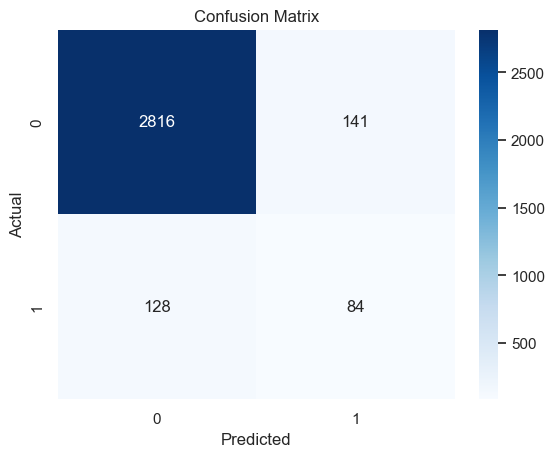

In [36]:

detree_class = DecisionTreeClassifier(random_state=21)
detree_class.fit(X_train, y_train)
y_pred_dt = detree_class.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


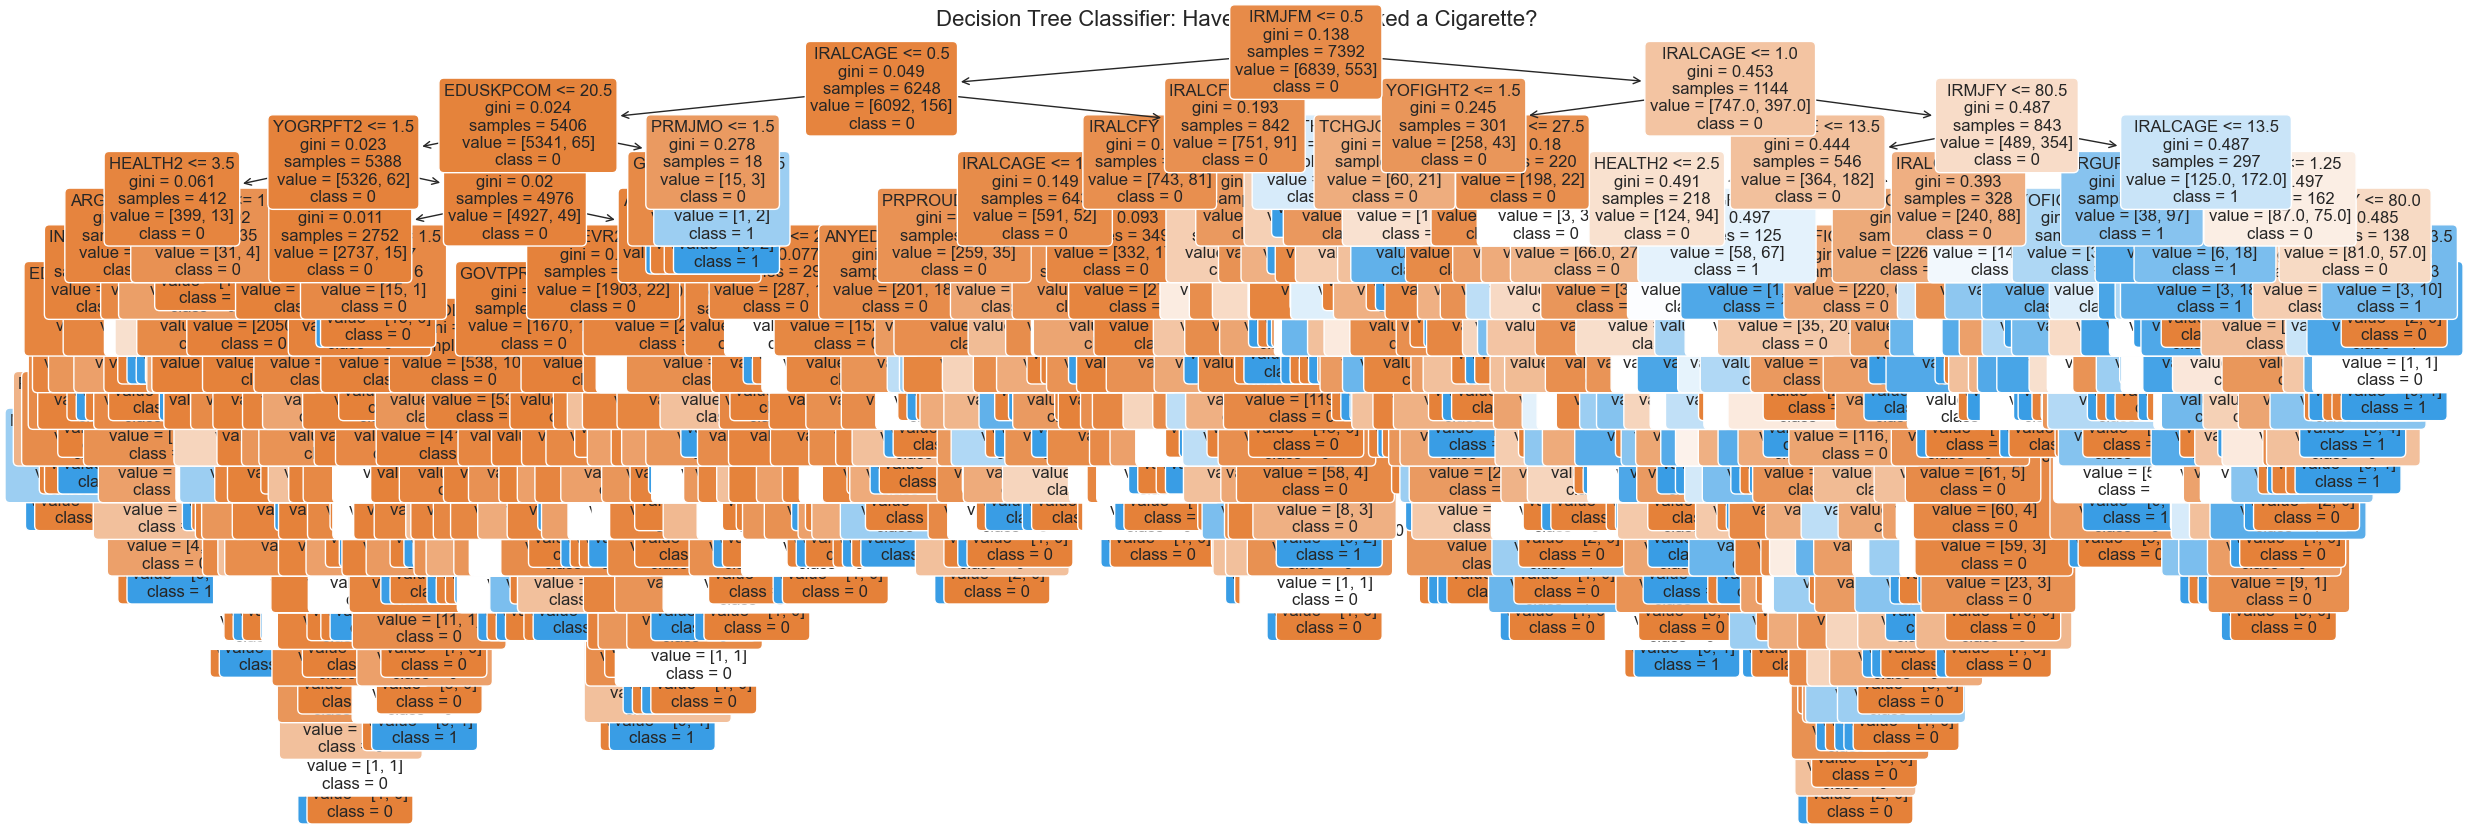

In [37]:
# Plotting the decision tree
plt.figure(figsize=(30,10))  
plot_tree(detree_class,
          feature_names=X_train.columns, 
          class_names=detree_class.classes_.astype(str),
          filled=True,
          rounded=True,
          fontsize=12)

plt.title("Decision Tree Classifier: Have you ever smoked a Cigarette?", fontsize=16)
plt.show()


## b) : Decision Tree Classifier + Bagging

In [39]:
%%time
# Decision Tree Classifier + Bagging

dt = DecisionTreeClassifier(random_state=12)
bag = BaggingClassifier(estimator=dt, random_state=12)
param_grid = {'n_estimators': [100, 200,300,],'estimator__max_depth': [None, 3, 5]}
grid = GridSearchCV(bag, param_grid, cv=5)
grid.fit(X_train, y_train)

# Best model
best_bag = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

pred_bag = best_bag.predict(X_test)
bag_acc = accuracy_score(y_test, pred_bag)
print(f"Bagging Accuracy: {bag_acc:.2f}")


Best Parameters: {'estimator__max_depth': None, 'n_estimators': 100}
Bagging Accuracy: 0.94
CPU times: total: 4min 6s
Wall time: 4min 20s


## c) Decision Tree Classifier + Boosting

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Confusion Matrix:
 [[2919   38]
 [ 154   58]]
Accuracy: 0.94


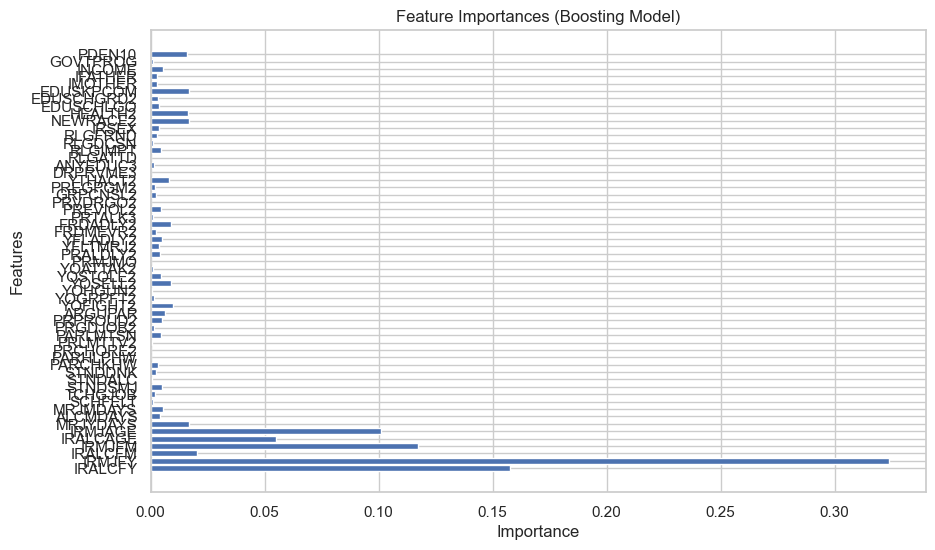

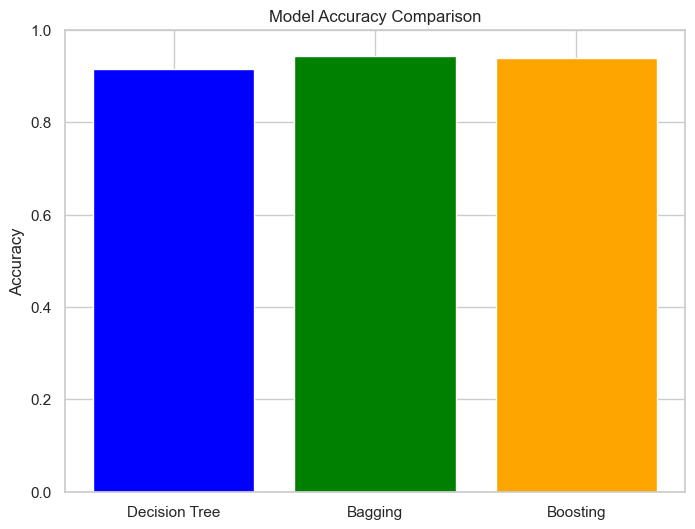

CPU times: total: 4.42 s
Wall time: 52.7 s


In [41]:
%%time
# Decision Tree Classifier + Boosting

from sklearn.ensemble import GradientBoostingClassifier
tree_boost = GradientBoostingClassifier(random_state=42)
param_tree_boost = {'n_estimators': [100,200,300],'learning_rate': [ 0.1,0.3],'max_depth': [3,5]}
tree_boost_model = GridSearchCV(estimator=tree_boost, param_grid=param_tree_boost, cv=3,  n_jobs=-1,verbose=1)
tree_boost_model.fit(X_train, y_train)

pred_tree_boost = tree_boost_model.predict(X_test)
acc_tree_boost = accuracy_score(y_test, pred_tree_boost)
cm_tree_boost = confusion_matrix(y_test, pred_tree_boost)
print("Confusion Matrix:\n", cm_tree_boost)
print(f"Accuracy: {acc_tree_boost:.2f}")

# Plotting Feature Importances for Boosting Model

plt.figure(figsize=(10, 6))
plt.barh(X.columns, tree_boost_model.best_estimator_.feature_importances_)
plt.title("Feature Importances (Boosting Model)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# Comparing Accuracy of Different Models
models = ['Decision Tree', 'Bagging', 'Boosting']
accuracies = [accuracy_score(y_test, y_pred_dt), bag_acc, acc_tree_boost]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


## 2) Multi - Class Classification : How frequently the Youth smoke ?

In [43]:
# Multi - Class Classification :




# Categorizing to Labels:
def cat_smoke(row):
    if row == 6:                
        return 'None'
    elif row in [1, 2]:        
        return 'Rarely'
    elif row == 3:             
        return 'Occasionally'
    elif row in [4, 5]:        
        return 'Frequently'
    else:
        return np.nan


df['Smoking_Freq'] = df['CIGMDAYS'].apply(cat_smoke)
df = df.dropna(subset=['Smoking_Freq'])

# Splitting Data :
mul_exclude_features = ["IRCIGAGE","IRCIGFM","CIGMDAYS","PRPKCIG2","YFLPKCG2","FRDPCIG2","STNDSCIG"]
X_mul = X_full.drop(columns=mul_exclude_features)
y_mul = df['Smoking_Freq']
X_mul_train, X_mul_test, y_mul_train, y_mul_test = train_test_split(
    X_mul, y_mul, test_size=0.3, train_size=0.7, random_state=12)

# Model + Tuning :
param_grid = {'max_depth': [3, 5, 7, 10],   'max_features': ['sqrt', 'log2', None]  }
dt_mul = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5)
dt_mul.fit(X_mul_train, y_mul_train)
mul_preds = dt_mul.predict(X_mul_test)

print("Accuracy:", accuracy_score(y_mul_test, mul_preds))
print("Confusion Matrix:\n", confusion_matrix(y_mul_test, mul_preds))
print("Classification Report:\n", classification_report(y_mul_test, mul_preds))




Accuracy: 0.9876932786367939
Confusion Matrix:
 [[   0    3    0    0]
 [   0 3130    0    0]
 [   0    3    0    0]
 [   0   33    0    0]]
Classification Report:
               precision    recall  f1-score   support

  Frequently       0.00      0.00      0.00         3
        None       0.99      1.00      0.99      3130
Occasionally       0.00      0.00      0.00         3
      Rarely       0.00      0.00      0.00        33

    accuracy                           0.99      3169
   macro avg       0.25      0.25      0.25      3169
weighted avg       0.98      0.99      0.98      3169



C:\Users\missi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\missi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\missi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.987377721678763
Confusion Matrix:
 [[   0    3    0    0]
 [   0 3129    0    1]
 [   0    3    0    0]
 [   0   33    0    0]]
Classification Report:
               precision    recall  f1-score   support

  Frequently       0.00      0.00      0.00         3
        None       0.99      1.00      0.99      3130
Occasionally       0.00      0.00      0.00         3
      Rarely       0.00      0.00      0.00        33

    accuracy                           0.99      3169
   macro avg       0.25      0.25      0.25      3169
weighted avg       0.98      0.99      0.98      3169



C:\Users\missi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\missi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\missi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9876932786367939
Confusion Matrix:
 [[   0    3    0    0]
 [   0 3130    0    0]
 [   0    3    0    0]
 [   0   33    0    0]]
Classification Report:
               precision    recall  f1-score   support

  Frequently       0.00      0.00      0.00         3
        None       0.99      1.00      0.99      3130
Occasionally       0.00      0.00      0.00         3
      Rarely       0.00      0.00      0.00        33

    accuracy                           0.99      3169
   macro avg       0.25      0.25      0.25      3169
weighted avg       0.98      0.99      0.98      3169



C:\Users\missi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\missi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\missi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


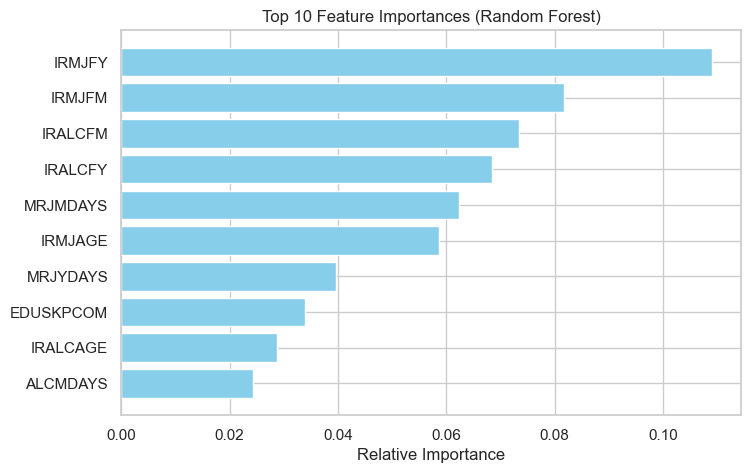

C:\Users\missi\AppData\Local\Temp\ipykernel_21332\595720223.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


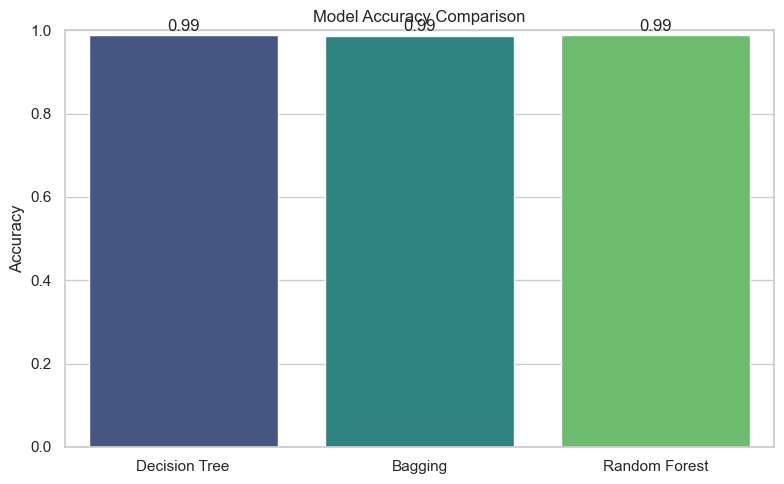

In [44]:
# 2. Bagging Classifier
mul_bag = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(), random_state=42),
                   param_grid={'n_estimators': [100,200,300]}, cv=3)
mul_bag.fit(X_mul_train, y_mul_train)
mul_bag_preds=mul_bag.predict(X_mul_test)
print("Accuracy:", accuracy_score(y_mul_test, mul_bag_preds))
print("Confusion Matrix:\n", confusion_matrix(y_mul_test, mul_bag_preds))
print("Classification Report:\n", classification_report(y_mul_test, mul_bag_preds))

# 3. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

mul_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                  param_grid={'n_estimators': [ 100,200], 'max_depth': [5, 10]}, cv=3)
mul_rf.fit(X_mul_train, y_mul_train)
mul_rf_preds=mul_rf.predict(X_mul_test)
print("Accuracy:", accuracy_score(y_mul_test, mul_rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_mul_test, mul_rf_preds))
print("Classification Report:\n", classification_report(y_mul_test, mul_rf_preds))

importances = mul_rf.best_estimator_.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]  # Top 10

plt.figure(figsize=(8,5))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



accuracies = {
    "Decision Tree": accuracy_score(y_mul_test, mul_preds),
    "Bagging": accuracy_score(y_mul_test, mul_bag_preds),
    "Random Forest": accuracy_score(y_mul_test, mul_rf_preds)
}

# Bar plot for accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()


# 3) At what Age did the Youth try their First Cigarette ?


Decision Tree Performance:
MAE: 0.12425197850698241
RMSE: 0.6930224476945288
R^2: 0.9498575103307346


C:\Users\missi\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


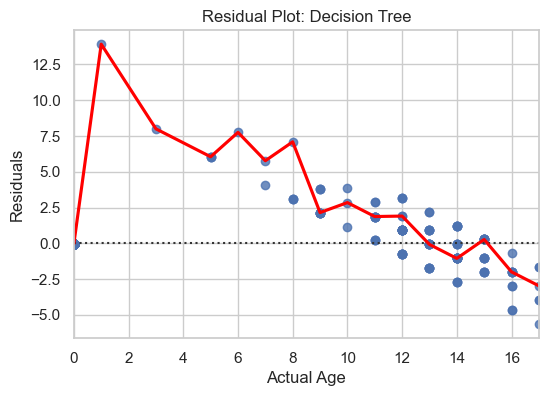


Bagging Regressor Performance:
MAE: 0.12073355418835777
RMSE: 0.6726526378642586
R^2: 0.952761838255576


C:\Users\missi\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


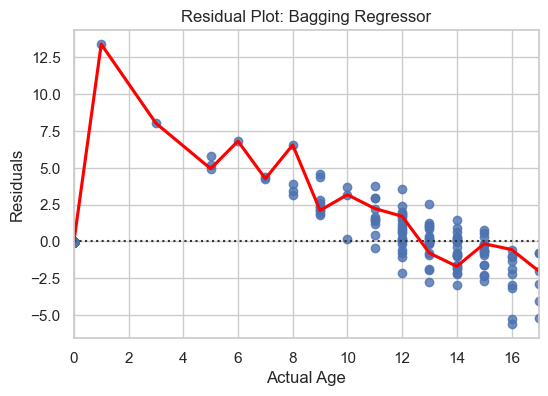


Random Forest Performance:
MAE: 0.11968723489009611
RMSE: 0.6686810598562156
R^2: 0.9533180129463936


C:\Users\missi\anaconda3\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


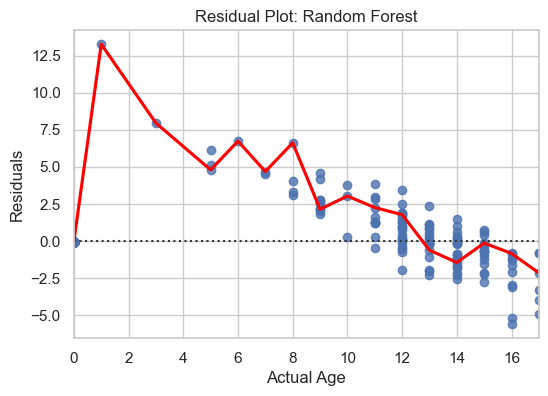

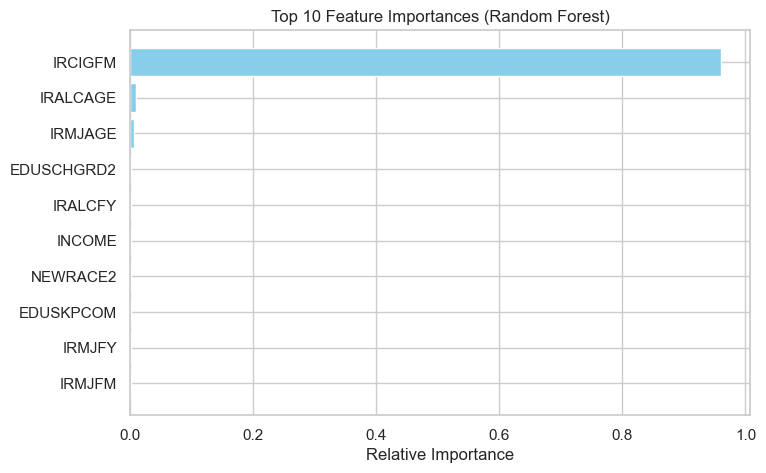

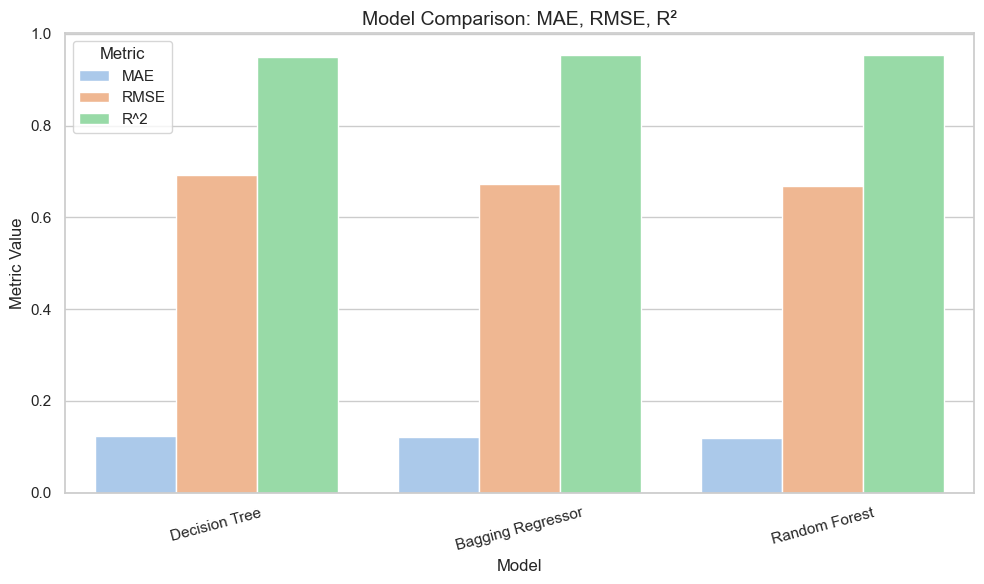

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


reg_df = df[(df['IRCIGAGE'].notna()) & (df['IRCIGAGE'] < 91)]

reg_df = reg_df.dropna()

X_reg = reg_df.drop(columns=['IRCIGAGE'])
exclude_features=["Smoking_Freq","Has_Smoked"]
X = X_reg.drop(columns=exclude_features)
y = reg_df['IRCIGAGE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = {}

def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

  
    results[name] = [mae, rmse, r2]

    print(f"\n{name} Performance:")
    print("MAE:", mae)
    print("RMSE:", rmse)
    print("R^2:", r2)

    # Residual plot
    plt.figure(figsize=(6, 4))
    sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={'color': 'red'})
    plt.title(f"Residual Plot: {name}")
    plt.xlabel("Actual Age")
    plt.ylabel("Residuals")
    plt.show()

# 1. Decision Tree Regressor
reg_dt_params = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
reg_dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), reg_dt_params, cv=5)
reg_dt_grid.fit(X_train, y_train)
evaluate_model("Decision Tree", reg_dt_grid.best_estimator_)

# 2. Bagging Regressor
reg_bag_grid = GridSearchCV(BaggingRegressor(estimator=DecisionTreeRegressor(), random_state=42), 
                        {'n_estimators': [10, 50, 100]}, cv=5)
reg_bag_grid.fit(X_train, y_train)
evaluate_model("Bagging Regressor", reg_bag_grid.best_estimator_)

# 3. Random Forest Regressor
reg_rf_params = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
reg_rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), reg_rf_params, cv=5)
reg_rf_grid.fit(X_train, y_train)
evaluate_model("Random Forest", reg_rf_grid.best_estimator_)


importances = reg_rf_grid.best_estimator_.feature_importances_
features = X.columns
indices = np.argsort(importances)[-10:]  # Top 10

plt.figure(figsize=(8,5))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

metrics_df = pd.DataFrame(results, index=["MAE", "RMSE", "R^2"]).T
metrics_df.reset_index(inplace=True)
metrics_df.columns = ["Model", "MAE", "RMSE", "R^2"]

melted_df = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x="Model", y="Value", hue="Metric", palette="pastel")

plt.title("Model Comparison: MAE, RMSE, R²", fontsize=14)
plt.ylabel("Metric Value")
plt.xlabel("Model")
plt.xticks(rotation=15)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()



